In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string

import time

from ast import literal_eval

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import MaxKColorGenerator, ContinuousPeaksGenerator, TSPGenerator,FlipFlopGenerator,KnapsackGenerator
from mlrose_hiive import SARunner, GARunner, MIMICRunner, RHCRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

C:\Users\jmaal\AppData\Local\Temp\ipykernel_16068\3499568711.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [2]:
# helper funcs

def percent_diff(x,y):
    return (2*(x-y))/(x+y)

def fitness_mean(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].max()
        fitness_list.append(fitness)
    return np.mean(fitness_list)

def fitness_var(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].max()
        fitness_list.append(fitness)
    return np.var(fitness_list)

def fitness_std(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].max()
        fitness_list.append(fitness)
    return np.std(fitness_list)

def feval_mean(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.mean(feval_list)

def feval_var(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.var(feval_list)

def feval_std(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.std(feval_list)


def time_mean(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.mean(time_list)

def time_var(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.var(time_list)

def time_std(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.std(time_list)

# given an array of runs, print mean and var for each size
def print_stats(runs_2d):
    for runs_arr in runs_2d:
        print("***RUN STATS***")
        print("mean fitness:",fitness_mean(runs_arr))
        print("VAR fitness:",fitness_var(runs_arr))
        print("STD fitness:",fitness_std(runs_arr))
        print("mean feval:", feval_mean(runs_arr))
        print("VAR feval:", feval_var(runs_arr))
        print("STD feval:", feval_std(runs_arr))
        print("mean runtime:", time_mean(runs_arr))
        print("var runtime:", time_var(runs_arr))
        print("STD runtime:", time_std(runs_arr))

def sa_params(runs_arr):
    print("***SA PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Temp:", run.iloc[0]['Temperature'])

def ga_params(runs_arr):
    print("***GA PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Population size:", run.iloc[0]['Population Size'])
        print("Mutation rate:", run.iloc[0]['Mutation Rate'])
        

def mmc_params(runs_arr):
    print("***MMC PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Population size:", run.iloc[0]['Population Size'])
        print("Keep Percent:", run.iloc[0]['Keep Percent'])

In [3]:
problem_sizes = [10,20,30,40]
problems = []

for size in problem_sizes:
    problem = FlipFlopGenerator().generate(
        seed=np.random.randint(0,1000), 
        size=size)
    problems.append(problem)

In [4]:
# Randomized Hill Climbing
# create a runner class and solve the problem with 5 random seeds
rhc_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        rhc = RHCRunner(problem=problem,
                    experiment_name='max_k_rhc',
                    output_directory=None,
                    seed=np.random.randint(0,1000),
                    iteration_list=2 ** np.arange(14),
                    max_attempts=20,
                    restart_list=[25])   
        
        # the two data frames will contain the results
        df_run_stats, df_run_curves = rhc.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].max()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        
        # id the best params        
        best_restarts = best_curve_run['Restarts'].iloc()[0]
        run_stats_best_run = df_run_stats[df_run_stats['Restarts'] == best_restarts]      
        # save run to array
        rhc_runs[i].append(run_stats_best_run)


In [5]:
print_stats(rhc_runs)

***RUN STATS***
mean fitness: 9.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 96.66666666666667
VAR feval: 6147.555555555555
STD feval: 78.4063489492755
mean runtime: 0.03556126666687002
var runtime: 0.00048307541281947714
STD runtime: 0.021978976609921517
***RUN STATS***
mean fitness: 17.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 1087.6666666666667
VAR feval: 917.5555555555557
STD feval: 30.291179500896884
mean runtime: 0.5722662666673083
var runtime: 0.003496833446447894
STD runtime: 0.05913402951302992
***RUN STATS***
mean fitness: 26.666666666666668
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 1275.0
VAR feval: 3640.6666666666665
STD feval: 60.33793720924396
mean runtime: 0.6653268000003058
var runtime: 0.002285609918742578
STD runtime: 0.04780805286499941
***RUN STATS***
mean fitness: 34.666666666666664
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 1347.0
VAR feval: 4464.666666666667
STD feval: 66.81816120387231

In [6]:
sa_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        sa = SARunner(problem=problem,
                  experiment_name='max_k_sa',
                  output_directory=None,
                  seed=np.random.randint(0,1000),
                  iteration_list=2 ** np.arange(14),
                  max_attempts=20,
                  temperature_list=[1000],
                  decay_list=[mlrose_hiive.GeomDecay])
        
        # the two data frames will contain the results
        df_run_stats, df_run_curves = sa.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].max()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        
        # id the best params        
        best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp
        run_stats_best_run = df_run_stats[df_run_stats['schedule_init_temp'] == best_init_temperature]      
        # save run to array
        sa_runs[i].append(run_stats_best_run)

print_stats(sa_runs)      

***RUN STATS***
mean fitness: 9.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 1142.6666666666667
VAR feval: 170752.88888888888
STD feval: 413.2225658030898
mean runtime: 0.07584839999981341
var runtime: 0.0014246726443483155
STD runtime: 0.03774483599577981
***RUN STATS***
mean fitness: 18.333333333333332
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 1504.0
VAR feval: 12674.666666666666
STD feval: 112.58182209693831
mean runtime: 0.11323683333284862
var runtime: 0.0003871224745139183
STD runtime: 0.01967542819137409
***RUN STATS***
mean fitness: 26.666666666666668
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 1639.0
VAR feval: 5160.666666666667
STD feval: 71.83778021811828
mean runtime: 0.16513566666617407
var runtime: 0.0006818282929712886
STD runtime: 0.026111842006478377
***RUN STATS***
mean fitness: 35.666666666666664
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 1683.6666666666667
VAR fe

In [7]:
# Simulated Annealing
# create a runner class and solve the problem with 5 random seeds

sa_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        sa = SARunner(problem=problem,
                  experiment_name='max_k_sa',
                  output_directory=None,
                  seed=np.random.randint(0,1000),
                  iteration_list=2 ** np.arange(14),
                  max_attempts=20,
                  temperature_list=[100],
                  decay_list=[mlrose_hiive.GeomDecay])
        
        # the two data frames will contain the results
        df_run_stats, df_run_curves = sa.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].max()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        
        # id the best params        
        best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp
        run_stats_best_run = df_run_stats[df_run_stats['schedule_init_temp'] == best_init_temperature]      
        # save run to array
        sa_runs[i].append(run_stats_best_run)


In [8]:
print_stats(sa_runs)

***RUN STATS***
mean fitness: 9.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 788.0
VAR feval: 18924.666666666668
STD feval: 137.56695339603428
mean runtime: 0.050193066666906816
var runtime: 0.00029173397169614425
STD runtime: 0.017080221652430165
***RUN STATS***
mean fitness: 18.333333333333332
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 1016.3333333333334
VAR feval: 1700.2222222222224
STD feval: 41.23375100839387
mean runtime: 0.06511606666632967
var runtime: 7.767582644644023e-05
STD runtime: 0.00881338904431435
***RUN STATS***
mean fitness: 27.333333333333332
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 1373.6666666666667
VAR feval: 7320.222222222223
STD feval: 85.55829721436854
mean runtime: 0.12261619999965963
var runtime: 0.0001652866802905259
STD runtime: 0.012856386750970348
***RUN STATS***
mean fitness: 37.333333333333336
VAR fitness: 0.888888888888889
STD fitness: 0.9428090415820634
mean feval: 1174.66666666

In [9]:
# Genetic Algorithm
# create a runner class and solve the problem with 5 random seeds

ga_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        ga = GARunner(problem=problem,
            experiment_name='max_k_ga',
            output_directory=None, # note: specify an output directory to have results saved to disk
            seed=np.random.randint(0,1000),
            iteration_list=2 ** np.arange(14),
            population_sizes=[500],
            mutation_rates=[.1])
        
        # the two data frames will contain the results
        df_run_stats, df_run_curves = ga.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].max()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        best_mr = best_curve_run['Mutation Rate'].iloc()[0]
        best_pop_size = best_curve_run['Population Size'].iloc()[0]
        # print(f'Best Mutation Rate: {best_mr}, best Population Size: {best_pop_size}')
        run_stats_best_run = df_run_stats[(df_run_stats['Mutation Rate'] == best_mr) & (df_run_stats['Population Size'] == best_pop_size)]
        
        # save run to array
        ga_runs[i].append(run_stats_best_run)


In [10]:
print_stats(ga_runs)

***RUN STATS***
mean fitness: 9.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 2.0
VAR feval: 0.0
STD feval: 0.0
mean runtime: 0.01196159999987382
var runtime: 5.48157714362177e-06
STD runtime: 0.0023412768190929005
***RUN STATS***
mean fitness: 19.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 11.0
VAR feval: 0.6666666666666666
STD feval: 0.816496580927726
mean runtime: 0.07603469999958179
var runtime: 3.118185705052535e-05
STD runtime: 0.00558407172684282
***RUN STATS***
mean fitness: 29.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 21.333333333333332
VAR feval: 2.8888888888888893
STD feval: 1.699673171197595
mean runtime: 0.20936166666676095
var runtime: 0.005254081111161442
STD runtime: 0.07248504060260601
***RUN STATS***
mean fitness: 39.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 33.0
VAR feval: 32.0
STD feval: 5.656854249492381
mean runtime: 0.41351429999970907
var runtime: 0.00028392775535908236
STD runtime: 0.01685015594465174


In [11]:
# MIMIC
# create a runner class and solve the problem with 5 random seeds
mmc_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        mmc = MIMICRunner(problem=problem,
                      experiment_name='max_k_mmc',
                      output_directory=None,
                      seed=np.random.randint(0,1000),
                      iteration_list=2 ** np.arange(14),
                      population_sizes=[500],
                      max_attempts=20,
                      keep_percent_list=[.2])
                      
    # the two data frames will contain the results
        df_run_stats, df_run_curves = mmc.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].max()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        
        # id the best params        
        best_keep = best_curve_run['Keep Percent'].iloc()[0]
        best_pop = best_curve_run['Population Size'].iloc()[0]
        run_stats_best_run = df_run_stats[(df_run_stats['Keep Percent'] == best_keep) & 
                                          (df_run_stats['Population Size'] == best_pop) ]      
        # save run to array
        mmc_runs[i].append(run_stats_best_run)


In [12]:
print_stats(mmc_runs)

***RUN STATS***
mean fitness: 9.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 2.0
VAR feval: 0.0
STD feval: 0.0
mean runtime: 0.040056633333127444
var runtime: 0.00016016332014983316
STD runtime: 0.012655564789839811
***RUN STATS***
mean fitness: 19.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 4.0
VAR feval: 0.0
STD feval: 0.0
mean runtime: 0.29094236666605866
var runtime: 0.001122986086939241
STD runtime: 0.03351098457131991
***RUN STATS***
mean fitness: 29.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 6.666666666666667
VAR feval: 0.22222222222222224
STD feval: 0.4714045207910317
mean runtime: 1.0185176000001472
var runtime: 0.026054927282654666
STD runtime: 0.16141538737882044
***RUN STATS***
mean fitness: 39.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 11.666666666666666
VAR feval: 1.5555555555555556
STD feval: 1.247219128924647
mean runtime: 3.364271666666658
var runtime: 0.10975924740337711
STD runtime: 0.331299332029778


In [13]:
# gather initial plot stats

rhc_meanfit = []
sa_meanfit = []
ga_meanfit = []
mmc_meanfit = []
rhc_sdfit = []
sa_sdfit = []
ga_sdfit = []
mmc_sdfit = []

rhc_meanfev = []
sa_meanfev = []
ga_meanfev = []
mmc_meanfev = []
rhc_sdfev = []
sa_sdfev = []
ga_sdfev = []
mmc_sdfev = []

rhc_meantime = []
sa_meantime = []
ga_meantime = []
mmc_meantime = []
rhc_sdtime = []
sa_sdtime = []
ga_sdtime = []
mmc_sdtime = []

for i in range(len(problems)):
    rhc_meanfit.append(fitness_mean(rhc_runs[i]))
    sa_meanfit.append(fitness_mean(sa_runs[i]))
    ga_meanfit.append(fitness_mean(ga_runs[i]))
    mmc_meanfit.append(fitness_mean(mmc_runs[i]))
    rhc_sdfit.append(fitness_std(rhc_runs[i]))
    sa_sdfit.append(fitness_std(sa_runs[i]))
    ga_sdfit.append(fitness_std(ga_runs[i]))
    mmc_sdfit.append(fitness_std(mmc_runs[i]))
    
    rhc_meanfev.append(feval_mean(rhc_runs[i]))
    sa_meanfev.append(feval_mean(sa_runs[i]))
    ga_meanfev.append(feval_mean(ga_runs[i]))
    mmc_meanfev.append(feval_mean(mmc_runs[i]))
    rhc_sdfev.append(feval_std(rhc_runs[i]))
    sa_sdfev.append(feval_std(sa_runs[i]))
    ga_sdfev.append(feval_std(ga_runs[i]))
    mmc_sdfev.append(feval_std(mmc_runs[i]))
    
    rhc_meantime.append(time_mean(rhc_runs[i]))
    sa_meantime.append(time_mean(sa_runs[i]))
    ga_meantime.append(time_mean(ga_runs[i]))
    mmc_meantime.append(time_mean(mmc_runs[i]))
    rhc_sdtime.append(time_std(rhc_runs[i]))
    sa_sdtime.append(time_std(sa_runs[i]))
    ga_sdtime.append(time_std(ga_runs[i]))
    mmc_sdtime.append(time_std(mmc_runs[i]))


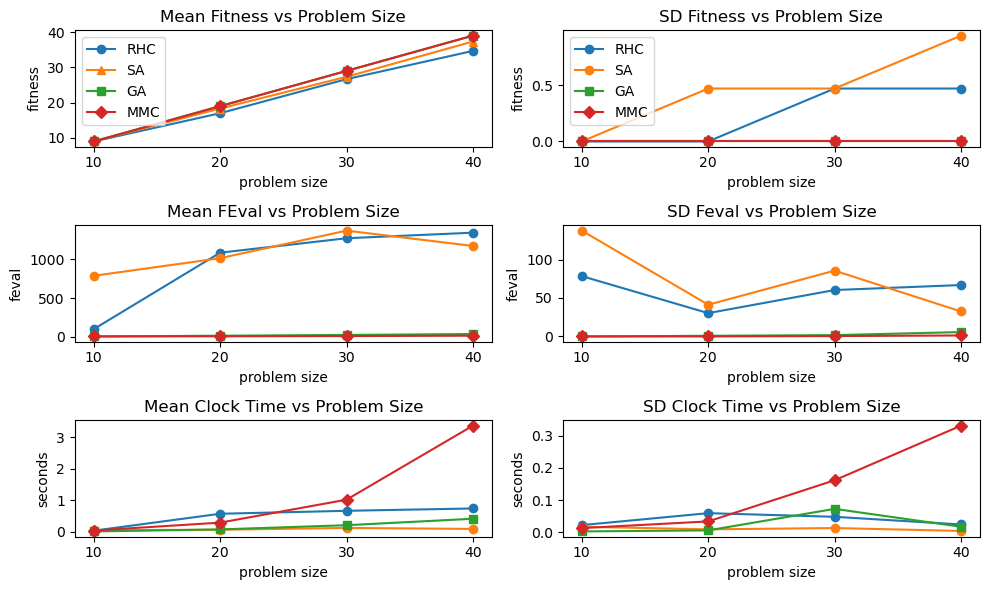

In [35]:
# Mean fitness/ problem size

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

for ax in axs.reshape(-1):   
    ax.set_xlabel("problem size")


# fitness mean
axs[0,0].plot(x, rhc_meanfit, label="RHC", marker="o")
axs[0,0].plot(x, sa_meanfit, label="SA",marker="^")
axs[0,0].plot(x, ga_meanfit, label="GA",marker="s")
axs[0,0].plot(x, mmc_meanfit, label="MMC",marker="D")
axs[0,0].set_xticks(x)
axs[0,0].set_ylabel("fitness")

#fitness sd

axs[0,1].plot(x, rhc_sdfit, label="RHC", marker="o")
axs[0,1].plot(x, sa_sdfit, label="SA",marker="o")
axs[0,1].plot(x, ga_sdfit, label="GA",marker="s")
axs[0,1].plot(x, mmc_sdfit, label="MMC",marker="D")
axs[0,1].set_xticks(x)
axs[0,1].set_ylabel("fitness")

#feval mean

axs[1,0].plot(x, rhc_meanfev, label="RHC", marker="o")
axs[1,0].plot(x, sa_meanfev, label="SA",marker="o")
axs[1,0].plot(x, ga_meanfev, label="GA",marker="s")
axs[1,0].plot(x, mmc_meanfev, label="MMC",marker="D")
axs[1,0].set_xticks(x)
axs[1,0].set_ylabel("feval")

# feval sd

axs[1,1].plot(x, rhc_sdfev, label="RHC", marker="o")
axs[1,1].plot(x, sa_sdfev, label="SA",marker="o")
axs[1,1].plot(x, ga_sdfev, label="GA",marker="s")
axs[1,1].plot(x, mmc_sdfev, label="MMC",marker="D")
axs[1,1].set_xticks(x)
axs[1,1].set_ylabel("feval")

#time mean

axs[2,0].plot(x, rhc_meantime, label="RHC", marker="o")
axs[2,0].plot(x, sa_meantime, label="SA",marker="o")
axs[2,0].plot(x, ga_meantime, label="GA",marker="s")
axs[2,0].plot(x, mmc_meantime, label="MMC",marker="D")
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("seconds")

#time sd

axs[2,1].plot(x, rhc_sdtime, label="RHC", marker="o")
axs[2,1].plot(x, sa_sdtime, label="SA",marker="o")
axs[2,1].plot(x, ga_sdtime, label="GA",marker="s")
axs[2,1].plot(x, mmc_sdtime, label="MMC",marker="D")
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("seconds")

axs[0,0].legend(loc="upper left")
axs[0,1].legend(loc="upper left")
plt.tight_layout()
plt.show()

In [15]:
# EDA

# MIMIC
# test pop sizes for fixed kpct = .2
pop_sz = [10,100,1000,10000]
pop_runs1 = [[[] for i in range(len(problems))] for j in range(len(pop_sz))]


for i in range(len(problems)):
    problem = problems[i]
    for k in range(len(pop_sz)):
        for j in range(3):
                 # init runner with random seed
            mmc = MIMICRunner(problem=problem,
                          experiment_name='max_k_mmc',
                          output_directory=None,
                          seed=np.random.randint(0,1000),
                          iteration_list=2 ** np.arange(13),
                          population_sizes=[pop_sz[k]],
                          max_attempts=20,
                          keep_percent_list=[.2])

        # the two data frames will contain the results
            df_run_stats, df_run_curves = mmc.run()
            # extract best runs in terms of fitness
            best_fitness = df_run_curves['Fitness'].max()
            best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
            # extract min eval out of best fitness runs
            minimum_evaluations = best_runs['FEvals'].min()
            best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]

            # id the best params        
            best_keep = best_curve_run['Keep Percent'].iloc()[0]
            best_pop = best_curve_run['Population Size'].iloc()[0]
            run_stats_best_run = df_run_stats[(df_run_stats['Keep Percent'] == best_keep) & 
                                              (df_run_stats['Population Size'] == best_pop) ]      
            # save run to array
            pop_runs1[k][i].append(run_stats_best_run)


In [16]:
for i in range(len(pop_sz)):
    print("POP=", pop_sz[i])
    print_stats(pop_runs1[i])

POP= 10
***RUN STATS***
mean fitness: 7.666666666666667
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 23.666666666666668
VAR feval: 1.5555555555555554
STD feval: 1.247219128924647
mean runtime: 0.76210063333383
var runtime: 0.0006630528372475026
STD runtime: 0.025749812373054345
***RUN STATS***
mean fitness: 12.0
VAR fitness: 0.6666666666666666
STD fitness: 0.816496580927726
mean feval: 21.333333333333332
VAR feval: 0.8888888888888888
STD feval: 0.9428090415820634
mean runtime: 2.325785499999862
var runtime: 0.028836892513079772
STD runtime: 0.16981428830660797
***RUN STATS***
mean fitness: 21.333333333333332
VAR fitness: 4.222222222222222
STD fitness: 2.0548046676563256
mean feval: 24.0
VAR feval: 8.0
STD feval: 2.8284271247461903
mean runtime: 5.653698066667251
var runtime: 0.22139302443645772
STD runtime: 0.47052420175423254
***RUN STATS***
mean fitness: 25.666666666666668
VAR fitness: 0.8888888888888888
STD fitness: 0.9428090415820634
mean feval: 22.0

In [17]:
# pop_sz plots 1

pop1_meanfit1 = [fitness_mean(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop1_meanfit2 = [fitness_mean(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop1_meanfit3 = [fitness_mean(pop_runs1[2][i]) for i in range(len(problem_sizes))]
pop1_meanfit4 = [fitness_mean(pop_runs1[3][i]) for i in range(len(problem_sizes))]
pop1_sdfit1 = [fitness_std(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop1_sdfit2 = [fitness_std(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop1_sdfit3 = [fitness_std(pop_runs1[2][i]) for i in range(len(problem_sizes))]
pop1_sdfit4 = [fitness_std(pop_runs1[3][i]) for i in range(len(problem_sizes))]

pop1_meanfev1 = [feval_mean(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop1_meanfev2 = [feval_mean(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop1_meanfev3 = [feval_mean(pop_runs1[2][i]) for i in range(len(problem_sizes))]
pop1_meanfev4 = [feval_mean(pop_runs1[3][i]) for i in range(len(problem_sizes))]
pop1_sdfev1 = [feval_std(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop1_sdfev2 = [feval_std(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop1_sdfev3 = [feval_std(pop_runs1[2][i]) for i in range(len(problem_sizes))]
pop1_sdfev4 = [feval_std(pop_runs1[3][i]) for i in range(len(problem_sizes))]

pop1_meantime1 = [time_mean(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop1_meantime2 = [time_mean(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop1_meantime3 = [time_mean(pop_runs1[2][i]) for i in range(len(problem_sizes))]
pop1_meantime4 = [time_mean(pop_runs1[3][i]) for i in range(len(problem_sizes))]
pop1_sdtime1 = [time_std(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop1_sdtime2 = [time_std(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop1_sdtime3 = [time_std(pop_runs1[2][i]) for i in range(len(problem_sizes))]
pop1_sdtime4 = [time_std(pop_runs1[3][i]) for i in range(len(problem_sizes))]

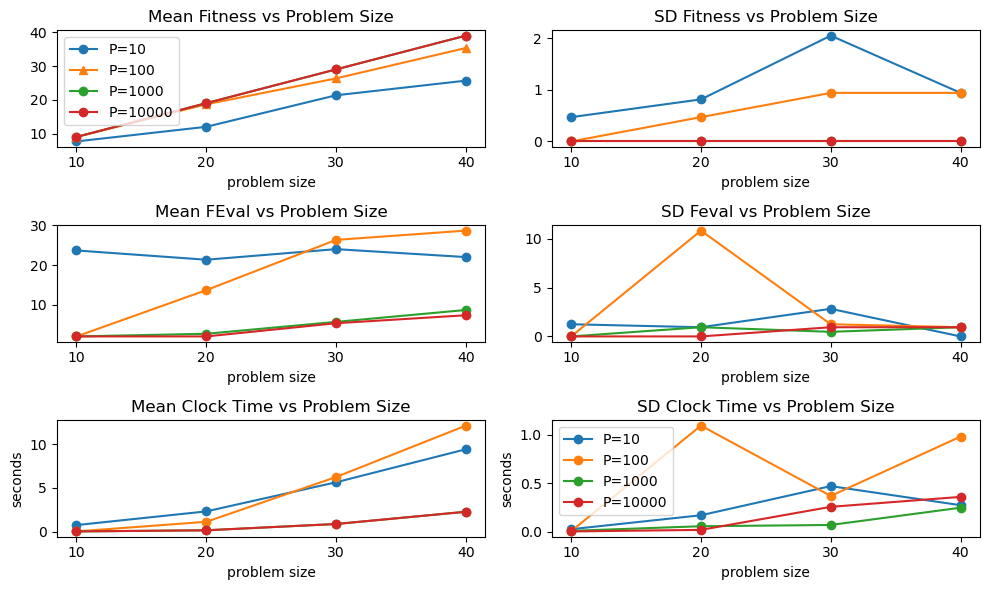

In [29]:
# Popsz1 plots

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

for ax in axs.reshape(-1):   
    ax.set_xlabel("problem size")


# fitness mean
axs[0,0].plot(x, pop1_meanfit1, label="P=10", marker="o")
axs[0,0].plot(x, pop1_meanfit2, label="P=100",marker="^")
axs[0,0].plot(x, pop1_meanfit3, label="P=1000",marker="o")
axs[0,0].plot(x, pop1_meanfit4, label="P=10000",marker="o")
axs[0,0].set_xticks(x)
axs[0,0].legend(loc="upper left")

#fitness sd

axs[0,1].plot(x, pop1_sdfit1, label="P=10", marker="o")
axs[0,1].plot(x, pop1_sdfit2, label="P=100",marker="o")
axs[0,1].plot(x, pop1_sdfit3, label="P=1000",marker="o")
axs[0,1].plot(x, pop1_sdfit4, label="P=1000",marker="o")
axs[0,1].set_xticks(x)

#feval mean

axs[1,0].plot(x, pop1_meanfev1, label="P=10", marker="o")
axs[1,0].plot(x, pop1_meanfev2, label="P=100",marker="o")
axs[1,0].plot(x, pop1_meanfev3, label="P=1000",marker="o")
axs[1,0].plot(x, pop1_meanfev4, label="P=10000",marker="o")
axs[1,0].set_xticks(x)

# feval sd

axs[1,1].plot(x, pop1_sdfev1, label="P=10", marker="o")
axs[1,1].plot(x, pop1_sdfev2, label="P=100",marker="o")
axs[1,1].plot(x, pop1_sdfev3, label="P=1000",marker="o")
axs[1,1].plot(x, pop1_sdfev4, label="P=10000",marker="o")
axs[1,1].set_xticks(x)

#time mean

axs[2,0].plot(x, pop1_meantime1, label="P=10", marker="o")
axs[2,0].plot(x, pop1_meantime2, label="P=100",marker="o")
axs[2,0].plot(x, pop1_meantime3, label="P=1000",marker="o")
axs[2,0].plot(x, pop1_meantime3, label="P=10000",marker="o")
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("seconds")

#time sd

axs[2,1].plot(x, pop1_sdtime1, label="P=10", marker="o")
axs[2,1].plot(x,pop1_sdtime2, label="P=100",marker="o")
axs[2,1].plot(x, pop1_sdtime3, label="P=1000",marker="o")
axs[2,1].plot(x, pop1_sdtime4, label="P=10000",marker="o")
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("seconds")

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [19]:
# EDA

# MIMIC
# test pop sizes for fixed kpct = .9
pop_sz = [10,100,1000]
pop_runs2 = [[[] for i in range(len(problems))] for j in range(len(pop_sz))]


for i in range(len(problems)):
    problem = problems[i]
    for k in range(len(pop_sz)):
        for j in range(3):
                 # init runner with random seed
            mmc = MIMICRunner(problem=problem,
                          experiment_name='max_k_mmc',
                          output_directory=None,
                          seed=np.random.randint(0,1000),
                          iteration_list=2 ** np.arange(13),
                          population_sizes=[pop_sz[k]],
                          max_attempts=20,
                          keep_percent_list=[.9])

        # the two data frames will contain the results
            df_run_stats, df_run_curves = mmc.run()
            # extract best runs in terms of fitness
            best_fitness = df_run_curves['Fitness'].max()
            best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
            # extract min eval out of best fitness runs
            
            minimum_evaluations = best_runs['FEvals'].min()
            best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]

            # id the best params        
            best_keep = best_curve_run['Keep Percent'].iloc()[0]
            best_pop = best_curve_run['Population Size'].iloc()[0]
            run_stats_best_run = df_run_stats[(df_run_stats['Keep Percent'] == best_keep) & 
                                              (df_run_stats['Population Size'] == best_pop) ]      
            # save run to array
            pop_runs2[k][i].append(run_stats_best_run)


In [20]:
for i in range(len(pop_sz)):
    print("POP=", pop_sz[i])
    print_stats(pop_runs2[i])

POP= 10
***RUN STATS***
mean fitness: 7.666666666666667
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 24.666666666666668
VAR feval: 6.222222222222222
STD feval: 2.494438257849294
mean runtime: 0.7098105666670259
var runtime: 0.00810428700821282
STD runtime: 0.09002381356181718
***RUN STATS***
mean fitness: 13.333333333333334
VAR fitness: 2.888888888888889
STD fitness: 1.699673171197595
mean feval: 23.333333333333332
VAR feval: 1.5555555555555554
STD feval: 1.247219128924647
mean runtime: 2.5059816333335525
var runtime: 0.014584396732496804
STD runtime: 0.1207658756954828
***RUN STATS***
mean fitness: 18.666666666666668
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 23.333333333333332
VAR feval: 1.5555555555555556
STD feval: 1.247219128924647
mean runtime: 5.6475960666660585
var runtime: 0.7997625332930159
STD runtime: 0.8942944332226472
***RUN STATS***
mean fitness: 25.333333333333332
VAR fitness: 1.5555555555555554
STD fitne

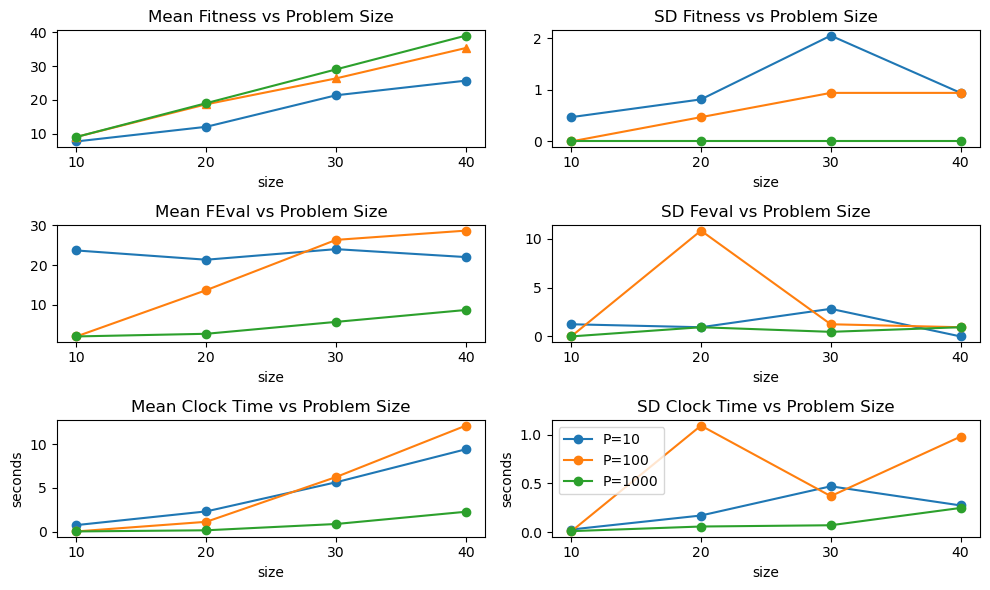

In [21]:
# pop_sz plots 2

pop2_meanfit1 = [fitness_mean(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop2_meanfit2 = [fitness_mean(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop2_meanfit3 = [fitness_mean(pop_runs1[2][i]) for i in range(len(problem_sizes))]
pop2_sdfit1 = [fitness_std(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop2_sdfit2 = [fitness_std(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop2_sdfit3 = [fitness_std(pop_runs1[2][i]) for i in range(len(problem_sizes))]

pop2_meanfev1 = [feval_mean(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop2_meanfev2 = [feval_mean(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop2_meanfev3 = [feval_mean(pop_runs1[2][i]) for i in range(len(problem_sizes))]
pop2_sdfev1 = [feval_std(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop2_sdfev2 = [feval_std(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop2_sdfev3 = [feval_std(pop_runs1[2][i]) for i in range(len(problem_sizes))]

pop2_meantime1 = [time_mean(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop2_meantime2 = [time_mean(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop2_meantime3 = [time_mean(pop_runs1[2][i]) for i in range(len(problem_sizes))]
pop2_sdtime1 = [time_std(pop_runs1[0][i]) for i in range(len(problem_sizes))]
pop2_sdtime2 = [time_std(pop_runs1[1][i]) for i in range(len(problem_sizes))]
pop2_sdtime3 = [time_std(pop_runs1[2][i]) for i in range(len(problem_sizes))]

# Popsz2 plots

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

for ax in axs.reshape(-1):   
    ax.set_xlabel("size")


# fitness mean
axs[0,0].plot(x, pop2_meanfit1, label="P=10", marker="o")
axs[0,0].plot(x, pop2_meanfit2, label="P=100",marker="^")
axs[0,0].plot(x, pop2_meanfit3, label="P=1000",marker="o")
axs[0,0].set_xticks(x)

#fitness sd

axs[0,1].plot(x, pop2_sdfit1, label="P=10", marker="o")
axs[0,1].plot(x, pop2_sdfit2, label="P=100",marker="o")
axs[0,1].plot(x, pop2_sdfit3, label="P=1000",marker="o")
axs[0,1].set_xticks(x)

#feval mean

axs[1,0].plot(x, pop2_meanfev1, label="P=10", marker="o")
axs[1,0].plot(x, pop2_meanfev2, label="P=100",marker="o")
axs[1,0].plot(x, pop2_meanfev3, label="P=1000",marker="o")
axs[1,0].set_xticks(x)

# feval sd

axs[1,1].plot(x, pop2_sdfev1, label="P=10", marker="o")
axs[1,1].plot(x, pop2_sdfev2, label="P=100",marker="o")
axs[1,1].plot(x, pop2_sdfev3, label="P=1000",marker="o")
axs[1,1].set_xticks(x)

#time mean

axs[2,0].plot(x, pop2_meantime1, label="P=10", marker="o")
axs[2,0].plot(x, pop2_meantime2, label="P=100",marker="o")
axs[2,0].plot(x, pop2_meantime3, label="P=1000",marker="o")
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("seconds")

#time sd

axs[2,1].plot(x, pop2_sdtime1, label="P=10", marker="o")
axs[2,1].plot(x,pop2_sdtime2, label="P=100",marker="o")
axs[2,1].plot(x, pop2_sdtime3, label="P=1000",marker="o")
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("seconds")

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [30]:
# EDA KPCT

# MIMIC
# test kpct for fixed pop = 10
kpct =  [.01,.1,.99]
kp_runs1 = [[[] for i in range(len(problems))] for j in range(len(kpct))]


for i in range(len(problems)):
    problem = problems[i]
    for k in range(len(kpct)):
        for j in range(3):
                 # init runner with random seed
            mmc = MIMICRunner(problem=problem,
                          experiment_name='max_k_mmc',
                          output_directory=None,
                          seed=np.random.randint(0,1000),
                          iteration_list=2 ** np.arange(14),
                          population_sizes=[10],
                          max_attempts=20,
                          keep_percent_list=[kpct[k]])

        # the two data frames will contain the results
            df_run_stats, df_run_curves = mmc.run()
            # extract best runs in terms of fitness
            best_fitness = df_run_curves['Fitness'].max()
            best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
            # extract min eval out of best fitness runs
            minimum_evaluations = best_runs['FEvals'].min()
            best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]

            # id the best params        
            best_keep = best_curve_run['Keep Percent'].iloc()[0]
            best_pop = best_curve_run['Population Size'].iloc()[0]
            run_stats_best_run = df_run_stats[(df_run_stats['Keep Percent'] == best_keep) & 
                                              (df_run_stats['Population Size'] == best_pop) ]      
            # save run to array
            kp_runs1[k][i].append(run_stats_best_run)


In [23]:
for i in range(len(kpct)):
    print("POP=", kpct[i])
    print_stats(kp_runs1[i])

POP= 0.01
***RUN STATS***
mean fitness: 7.6
VAR fitness: 0.24
STD fitness: 0.4898979485566356
mean feval: 22.4
VAR feval: 0.6399999999999999
STD feval: 0.7999999999999999
mean runtime: 0.5797062199999345
var runtime: 0.001023793715520649
STD runtime: 0.03199677664266588
***RUN STATS***
mean fitness: 12.6
VAR fitness: 0.6399999999999999
STD fitness: 0.7999999999999999
mean feval: 21.6
VAR feval: 0.6399999999999999
STD feval: 0.7999999999999999
mean runtime: 2.247714260000066
var runtime: 0.034319920926395645
STD runtime: 0.18525636541397342
***RUN STATS***
mean fitness: 20.4
VAR fitness: 4.24
STD fitness: 2.0591260281974
mean feval: 22.4
VAR feval: 0.64
STD feval: 0.8
mean runtime: 5.346414799999911
var runtime: 0.03765168682542427
STD runtime: 0.19404042575047156
***RUN STATS***
mean fitness: 24.4
VAR fitness: 5.4399999999999995
STD fitness: 2.33238075793812
mean feval: 22.8
VAR feval: 2.5599999999999996
STD feval: 1.5999999999999999
mean runtime: 9.306463400000212
var runtime: 0.31057

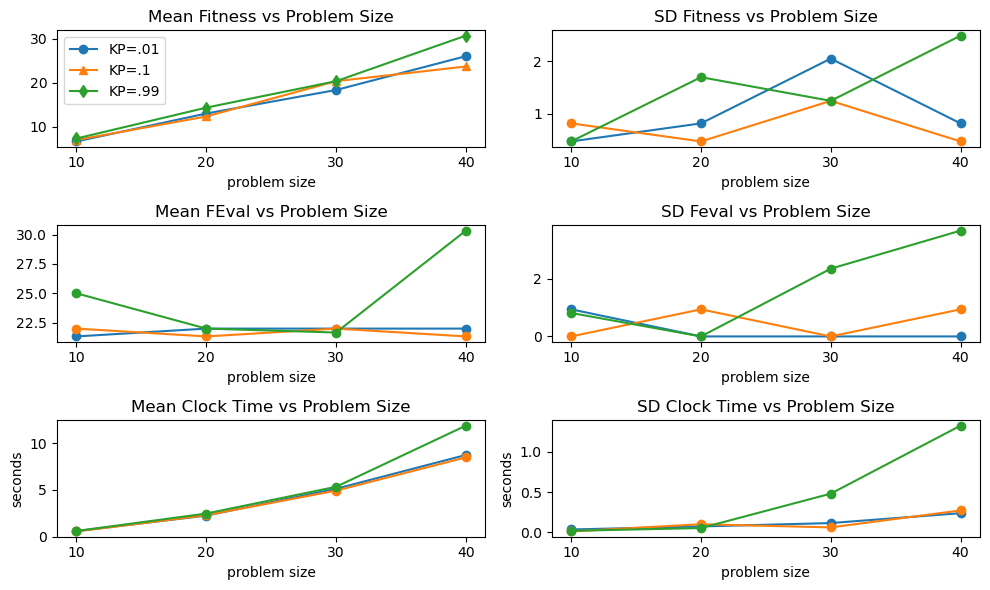

In [32]:
#  plots kpruns1

kp1_meanfit1 = [fitness_mean(kp_runs1[0][i]) for i in range(len(problem_sizes))]
kp1_meanfit2 = [fitness_mean(kp_runs1[1][i]) for i in range(len(problem_sizes))]
kp1_meanfit3 = [fitness_mean(kp_runs1[2][i]) for i in range(len(problem_sizes))]
kp1_sdfit1 = [fitness_std(kp_runs1[0][i]) for i in range(len(problem_sizes))]
kp1_sdfit2 = [fitness_std(kp_runs1[1][i]) for i in range(len(problem_sizes))]
kp1_sdfit3 = [fitness_std(kp_runs1[2][i]) for i in range(len(problem_sizes))]

kp1_meanfev1 = [feval_mean(kp_runs1[0][i]) for i in range(len(problem_sizes))]
kp1_meanfev2 = [feval_mean(kp_runs1[1][i]) for i in range(len(problem_sizes))]
kp1_meanfev3 = [feval_mean(kp_runs1[2][i]) for i in range(len(problem_sizes))]
kp1_sdfev1 = [feval_std(kp_runs1[0][i]) for i in range(len(problem_sizes))]
kp1_sdfev2 = [feval_std(kp_runs1[1][i]) for i in range(len(problem_sizes))]
kp1_sdfev3 = [feval_std(kp_runs1[2][i]) for i in range(len(problem_sizes))]

kp1_meantime1 = [time_mean(kp_runs1[0][i]) for i in range(len(problem_sizes))]
kp1_meantime2 = [time_mean(kp_runs1[1][i]) for i in range(len(problem_sizes))]
kp1_meantime3 = [time_mean(kp_runs1[2][i]) for i in range(len(problem_sizes))]
kp1_sdtime1 = [time_std(kp_runs1[0][i]) for i in range(len(problem_sizes))]
kp1_sdtime2 = [time_std(kp_runs1[1][i]) for i in range(len(problem_sizes))]
kp1_sdtime3 = [time_std(kp_runs1[2][i]) for i in range(len(problem_sizes))]

# Popsz2 plots

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

kp_list = [.01,.1,.99]

for ax in axs.reshape(-1):
    ax.set_xlabel("problem size")


# fitness mean
axs[0,0].plot(x, kp1_meanfit1, label="KP=.01", marker="o")
axs[0,0].plot(x, kp1_meanfit2, label="KP=.1",marker="^")
axs[0,0].plot(x, kp1_meanfit3, label="KP=.99",marker="d")
axs[0,0].set_xticks(x)
axs[0,0].legend(loc="upper left")

#fitness sd

axs[0,1].plot(x, kp1_sdfit1, label="KP=.01", marker="o")
axs[0,1].plot(x, kp1_sdfit2, label="KP=.01",marker="o")
axs[0,1].plot(x, kp1_sdfit3, label="KP=.01",marker="o")
axs[0,1].set_xticks(x)

#feval mean

axs[1,0].plot(x, kp1_meanfev1, label="KP=.01", marker="o")
axs[1,0].plot(x, kp1_meanfev2, label="KP=.01",marker="o")
axs[1,0].plot(x, kp1_meanfev3, label="KP=.01",marker="o")
axs[1,0].set_xticks(x)

# feval sd

axs[1,1].plot(x, kp1_sdfev1, label="KP=.01", marker="o")
axs[1,1].plot(x, kp1_sdfev2, label="KP=.01",marker="o")
axs[1,1].plot(x, kp1_sdfev3, label="KP=.01",marker="o")
axs[1,1].set_xticks(x)

#time mean

axs[2,0].plot(x, kp1_meantime1, label="KP=.01", marker="o")
axs[2,0].plot(x, kp1_meantime2, label="KP=.01",marker="o")
axs[2,0].plot(x, kp1_meantime3, label="KP=.01",marker="o")
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("seconds")

#time sd

axs[2,1].plot(x, kp1_sdtime1, label="KP=.01", marker="o")
axs[2,1].plot(x,kp1_sdtime2, label="KP=.01",marker="o")
axs[2,1].plot(x, kp1_sdtime3, label="KP=.01",marker="o")
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("seconds")

plt.tight_layout()
plt.show()


In [33]:
# EDA KPCT

# MIMIC
# test kpct for fixed pop = 1000
kpct = [.01,.1,.99]
kp_runs2 = [[[] for i in range(len(problems))] for j in range(len(kpct))]


for i in range(len(problems)):
    problem = problems[i]
    for k in range(len(kpct)):
        for j in range(3):
                 # init runner with random seed
            mmc = MIMICRunner(problem=problem,
                          experiment_name='max_k_mmc',
                          output_directory=None,
                          seed=np.random.randint(0,1000),
                          iteration_list=2 ** np.arange(14),
                          population_sizes=[1000],
                          max_attempts=20,
                          keep_percent_list=[kpct[k]])

        # the two data frames will contain the results
            df_run_stats, df_run_curves = mmc.run()
            # extract best runs in terms of fitness
            best_fitness = df_run_curves['Fitness'].max()
            best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
            # extract min eval out of best fitness runs
            minimum_evaluations = best_runs['FEvals'].min()
            best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]

            # id the best params        
            best_keep = best_curve_run['Keep Percent'].iloc()[0]
            best_pop = best_curve_run['Population Size'].iloc()[0]
            run_stats_best_run = df_run_stats[(df_run_stats['Keep Percent'] == best_keep) & 
                                              (df_run_stats['Population Size'] == best_pop) ]      
            # save run to array
            kp_runs2[k][i].append(run_stats_best_run)


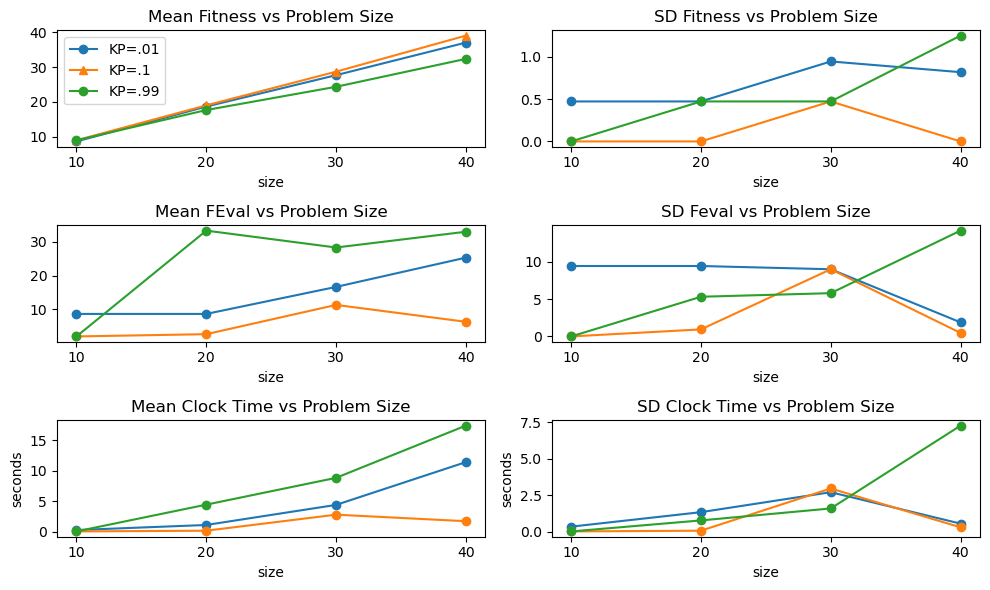

In [34]:
# KPCT plots 2

kp1_meanfit1 = [fitness_mean(kp_runs2[0][i]) for i in range(len(problem_sizes))]
kp1_meanfit2 = [fitness_mean(kp_runs2[1][i]) for i in range(len(problem_sizes))]
kp1_meanfit3 = [fitness_mean(kp_runs2[2][i]) for i in range(len(problem_sizes))]
kp1_sdfit1 = [fitness_std(kp_runs2[0][i]) for i in range(len(problem_sizes))]
kp1_sdfit2 = [fitness_std(kp_runs2[1][i]) for i in range(len(problem_sizes))]
kp1_sdfit3 = [fitness_std(kp_runs2[2][i]) for i in range(len(problem_sizes))]

kp1_meanfev1 = [feval_mean(kp_runs2[0][i]) for i in range(len(problem_sizes))]
kp1_meanfev2 = [feval_mean(kp_runs2[1][i]) for i in range(len(problem_sizes))]
kp1_meanfev3 = [feval_mean(kp_runs2[2][i]) for i in range(len(problem_sizes))]
kp1_sdfev1 = [feval_std(kp_runs2[0][i]) for i in range(len(problem_sizes))]
kp1_sdfev2 = [feval_std(kp_runs2[1][i]) for i in range(len(problem_sizes))]
kp1_sdfev3 = [feval_std(kp_runs2[2][i]) for i in range(len(problem_sizes))]

kp1_meantime1 = [time_mean(kp_runs2[0][i]) for i in range(len(problem_sizes))]
kp1_meantime2 = [time_mean(kp_runs2[1][i]) for i in range(len(problem_sizes))]
kp1_meantime3 = [time_mean(kp_runs2[2][i]) for i in range(len(problem_sizes))]
kp1_sdtime1 = [time_std(kp_runs2[0][i]) for i in range(len(problem_sizes))]
kp1_sdtime2 = [time_std(kp_runs2[1][i]) for i in range(len(problem_sizes))]
kp1_sdtime3 = [time_std(kp_runs2[2][i]) for i in range(len(problem_sizes))]


fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

for ax in axs.reshape(-1):   
	    ax.set_xlabel("size")


# fitness mean
axs[0,0].plot(x, kp1_meanfit1, label="KP=.01", marker="o")
axs[0,0].plot(x, kp1_meanfit2, label="KP=.1",marker="^")
axs[0,0].plot(x, kp1_meanfit3, label="KP=.99",marker="o")
axs[0,0].set_xticks(x)
axs[0,0].legend(loc="upper left")

#fitness sd

axs[0,1].plot(x, kp1_sdfit1, label="P=10", marker="o")
axs[0,1].plot(x, kp1_sdfit2, label="P=100",marker="o")
axs[0,1].plot(x, kp1_sdfit3, label="P=1000",marker="o")
axs[0,1].set_xticks(x)

#feval mean

axs[1,0].plot(x, kp1_meanfev1, label="P=10", marker="o")
axs[1,0].plot(x, kp1_meanfev2, label="P=100",marker="o")
axs[1,0].plot(x, kp1_meanfev3, label="P=1000",marker="o")
axs[1,0].set_xticks(x)

# feval sd

axs[1,1].plot(x, kp1_sdfev1, label="P=10", marker="o")
axs[1,1].plot(x, kp1_sdfev2, label="P=100",marker="o")
axs[1,1].plot(x, kp1_sdfev3, label="P=1000",marker="o")
axs[1,1].set_xticks(x)

#time mean

axs[2,0].plot(x, kp1_meantime1, label="P=10", marker="o")
axs[2,0].plot(x, kp1_meantime2, label="P=100",marker="o")
axs[2,0].plot(x, kp1_meantime3, label="P=1000",marker="o")
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("seconds")

#time sd

axs[2,1].plot(x, kp1_sdtime1, label="P=10", marker="o")
axs[2,1].plot(x,kp1_sdtime2, label="P=100",marker="o")
axs[2,1].plot(x, kp1_sdtime3, label="P=1000",marker="o")
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("seconds")

plt.tight_layout()
plt.show()


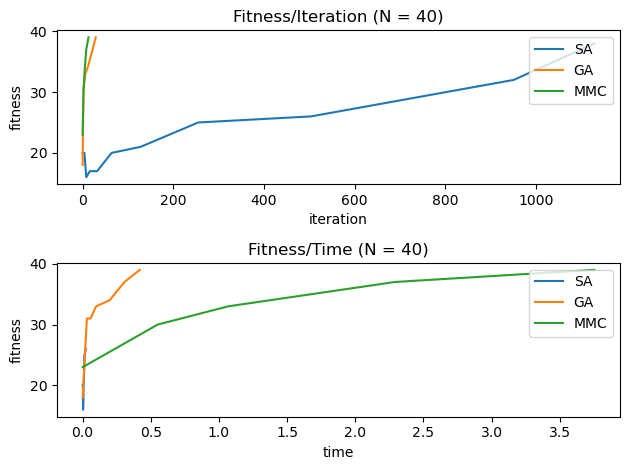

In [28]:
# Group fitness curve

sa_x1 = sa_runs[3][0]["FEvals"][:12].values.tolist()
sa_y1 = sa_runs[3][0]["Fitness"][:12].values.tolist()
sa_x2 = sa_runs[3][0]["Time"][:10].values.tolist()
sa_y2 = sa_runs[3][0]["Fitness"][:10].values.tolist()


ga_x1 = ga_runs[3][0]["FEvals"][:12].values.tolist()
ga_y1 = ga_runs[3][0]["Fitness"][:12].values.tolist()
ga_x2 = ga_runs[3][0]["Time"][:10].values.tolist()
ga_y2 = ga_runs[3][0]["Fitness"][:10].values.tolist()

mmc_x1 = mmc_runs[3][0]["FEvals"][:12].values.tolist()
mmc_y1 = mmc_runs[3][0]["Fitness"][:12].values.tolist()
mmc_x2 = mmc_runs[3][0]["Time"][:10].values.tolist()
mmc_y2 = mmc_runs[3][0]["Fitness"][:10].values.tolist()


fig, ax = plt.subplots(2,1)

ax[0].set_title("Fitness/Iteration (N = 40)")
ax[1].set_title("Fitness/Time (N = 40)")

ax[0].plot(sa_x1, sa_y1, label="SA")  
ax[0].plot(ga_x1, ga_y1, label="GA")  
ax[0].plot(mmc_x1, mmc_y1, label="MMC")
ax[0].set_xlabel("iteration")
ax[0].set_ylabel("fitness")
ax[0].legend(loc="upper right")

ax[1].plot(sa_x2, sa_y2, label="SA") 
ax[1].plot(ga_x2, ga_y2, label="GA")  
ax[1].plot(mmc_x2, mmc_y2, label="MMC")  
ax[1].set_xlabel("time")
ax[1].set_ylabel("fitness")
ax[1].legend(loc="upper right")


fig.tight_layout()